In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read data

In [14]:
df = pd.read_csv('data/iron/iron_feature_data.csv')

df_target = pd.read_csv('data/iron/iron_target_data.csv')

df = df.rename(columns = {'Unnamed: 0':'date'})

In [16]:
df

,date,FeatureFamily.CTA,FeatureFamily.CTA.1,FeatureFamily.CURVE,FeatureFamily.CURVE.1,FeatureFamily.CURVE.2,FeatureFamily.CURRENCY,FeatureFamily.CURRENCY.1,FeatureFamily.CURRENCY.2,FeatureFamily.CURRENCY.3,...,FeatureFamily.MACRO.13,FeatureFamily.MACRO.14,FeatureFamily.MACRO.15,FeatureFamily.MACRO.16,FeatureFamily.MACRO.17,FeatureFamily.MACRO.18,FeatureFamily.MACRO.19,FeatureFamily.MACRO.20,FeatureFamily.MACRO.21,FeatureFamily.TECHNICAL
0,NaN,FeatureName.CTA,FeatureName.CTA,FeatureName.CURVE,FeatureName.CURVE,FeatureName.CURVE,FeatureName.EXCHANGE_CURRENCY,FeatureName.EXPORT_CURRENCY,FeatureName.EXPORT_CURRENCY,FeatureName.EXPORT_CURRENCY,...,FeatureName.SENTIMENT,FeatureName.SENTIMENT,FeatureName.SENTIMENT,FeatureName.SENTIMENT,FeatureName.SENTIMENT,FeatureName.SENTIMENT,FeatureName.SENTIMENT,FeatureName.SENTIMENT,FeatureName.SENTIMENT,FeatureName.TECHNICAL
1,NaN,cta_signal_fs,cta_signal_fs_fast,timespread,timespread_risk_adjusted,convergence_22,us_dollar_index,australian_dollar_spot,brazilian_real_spot,south_african_rand_spot,...,china_caixin_pmi,germany_pmi,japan_pmi,us_pmi,china_gdp_agr,germany_gdp_agr,pct_change_indpro_us,japan_gdp_agr,us_gdp_agr,ewma_cross
2,date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-10-22,NaN,NaN,-0.029621347630406112,-0.021467232543715156,NaN,-2.717381971880949,1.0315054284122231,-0.08968144136792952,-0.03811952981931368,...,NaN,-0.001400499814963709,2.31273182633532e-05,NaN,10.536442086670943,4.571562186812123,-1.2479178312040062,5.501072260317989,3.0620960098736276,NaN
4,2010-10-25,NaN,NaN,-0.03254560548699419,-0.02325709880724573,NaN,-3.0056866332636596,1.2041793846947317,-0.11630322447041744,-0.035781673274859725,...,NaN,-0.0013067125320023346,2.3077244396175304e-05,NaN,10.51903854434189,4.5752434457103845,-1.2298986226032302,5.5268233441646,3.067002660044316,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,2022-02-23,0.45210615222508616,0.40227587788799957,-0.045150510087837076,-0.0744903208557598,0.038825161422476,0.36317771789039915,0.12710582349199878,-0.40796528554821443,-0.02557777702949866,...,-3.863872481588647e-05,0.001052257835962458,0.00010541794124968899,5.1052408405084525e-06,4.5417481709847465,1.8049389120522492,1.2304217117612566,0.4035927336661934,5.497311218548844,-0.0029641077790233
2962,2022-02-24,0.45582957538301677,0.40533202712224287,-0.0433237750532551,-0.07435832634306025,0.037357581647335415,1.1138983124388913,-0.1070952359203536,-0.29313540860101045,-0.0039364660449003165,...,-3.8586199843673266e-05,0.0009817912765560993,0.00010527774934934415,5.096782063603676e-06,4.526934038759871,1.8042995726691557,1.2351237028036888,0.4031276563168776,5.497659279793115,-0.0031013352693110537
2963,2022-02-25,0.4587199202131506,0.4010386030179618,-0.04299002879335599,-0.07424543003229646,0.037412462167490015,0.6589600838031493,0.122088313412119,-0.25044141496474026,-0.022280175445452764,...,-3.85337483700995e-05,0.0009160436518298782,0.00010513774534987806,5.088337532217391e-06,4.512524999759725,1.8037429954090662,1.2398144687428105,0.40272278296845443,5.497962284705378,-0.0036063445994228525
2964,2022-02-28,0.46067557046329966,0.4003228584632258,-0.042909342200300946,-0.07413591081032325,0.037579732628617704,0.7117940221125941,0.21409293606712645,-0.24664279153237148,-0.0028760349506786707,...,-2.9605221268112834e-06,-0.0013965049110343513,6.293437401992365e-05,7.872717683929828e-05,4.498509976688777,1.8032584667617775,1.2547594630432173,0.4023703202469211,5.49822606580243,-0.0032568017081840463


In [17]:
df = df[3:].reset_index(drop=True)

<AxesSubplot:>

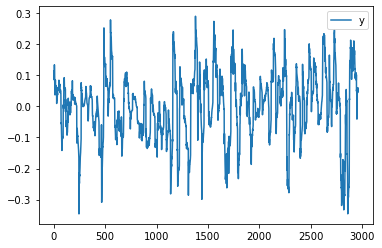

In [18]:
df_target.plot()

In [19]:
# df = pd.read_csv('dataset/al_lme_prices.csv')

# df.al_lme_prices

## Check number of NULL val in each row

In [27]:
change_i = 0
for index, i in enumerate(df.isnull().sum(axis=1)):
    if change_i != i: 
        change_i = i 
        print(df.iloc[index]['date'], '  {} features are NULL, {} features are Availiable'.format(i, 76-i))

2010-10-22   16 features are NULL, 60 features are Availiable
2010-10-25   15 features are NULL, 61 features are Availiable
2010-12-07   14 features are NULL, 62 features are Availiable
2011-01-19   13 features are NULL, 63 features are Availiable
2011-03-28   12 features are NULL, 64 features are Availiable
2011-12-01   11 features are NULL, 65 features are Availiable
2012-07-03   10 features are NULL, 66 features are Availiable
2012-10-02   8 features are NULL, 68 features are Availiable
2014-03-24   7 features are NULL, 69 features are Availiable
2015-01-05   1 features are NULL, 75 features are Availiable
2015-07-27   0 features are NULL, 76 features are Availiable


## Choose dataset after 2015-01-05, get rid of all null features

In [23]:
select_date = '2010-10-22'
df_features = df[df['date'] >= select_date].reset_index(drop=True)

# null features
null_features = df.columns[df[df['date'] == select_date].isnull().squeeze()]

# features dataframe 
df_features = df_features.drop(columns=null_features)

# target dataframe
df_target = df_target[df_target['date'] >= select_date].reset_index(drop=True)

In [28]:
df_features.columns

Index(['date', 'FeatureFamily.CURVE', 'FeatureFamily.CURVE.1',
       'FeatureFamily.CURRENCY', 'FeatureFamily.CURRENCY.1',
       'FeatureFamily.CURRENCY.2', 'FeatureFamily.CURRENCY.3',
       'FeatureFamily.CURRENCY.4', 'FeatureFamily.CURRENCY.5',
       'FeatureFamily.CURRENCY.6', 'FeatureFamily.CURRENCY.7',
       'FeatureFamily.CURRENCY.8', 'FeatureFamily.CURRENCY.9',
       'FeatureFamily.CURRENCY.10', 'FeatureFamily.CURRENCY.11',
       'FeatureFamily.CURRENCY.12', 'FeatureFamily.CURRENCY.13',
       'FeatureFamily.CURRENCY.14', 'FeatureFamily.CURRENCY.15',
       'FeatureFamily.CURRENCY.16', 'FeatureFamily.CURRENCY.17',
       'FeatureFamily.SATELLITE', 'FeatureFamily.SATELLITE.1',
       'FeatureFamily.SATELLITE.2', 'FeatureFamily.SATELLITE.3',
       'FeatureFamily.SATELLITE.4', 'FeatureFamily.SATELLITE.5',
       'FeatureFamily.SATELLITE.6', 'FeatureFamily.SATELLITE.7',
       'FeatureFamily.SATELLITE.8', 'FeatureFamily.SATELLITE.9',
       'FeatureFamily.SATELLITE.10', 'Fea

In [29]:
df_merge = pd.merge(df_features,df_target, on='date')

In [31]:
df_merge.to_csv('2010-2022-iron.csv',index=False)

In [32]:
df_merge

,date,FeatureFamily.CURVE,FeatureFamily.CURVE.1,FeatureFamily.CURRENCY,FeatureFamily.CURRENCY.1,FeatureFamily.CURRENCY.2,FeatureFamily.CURRENCY.3,FeatureFamily.CURRENCY.4,FeatureFamily.CURRENCY.5,FeatureFamily.CURRENCY.6,...,FeatureFamily.MACRO.11,FeatureFamily.MACRO.12,FeatureFamily.MACRO.14,FeatureFamily.MACRO.15,FeatureFamily.MACRO.17,FeatureFamily.MACRO.18,FeatureFamily.MACRO.19,FeatureFamily.MACRO.20,FeatureFamily.MACRO.21,y
0,2010-10-22,-0.029621347630406112,-0.021467232543715156,-2.717381971880949,1.0315054284122231,-0.08968144136792952,-0.03811952981931368,-0.002863636098570899,0.000142057102116178,-0.056869944371017826,...,6.909109096144841e-05,0.007199426216294428,-0.001400499814963709,2.31273182633532e-05,10.536442086670943,4.571562186812123,-1.2479178312040062,5.501072260317989,3.0620960098736276,0.112286
1,2010-10-25,-0.03254560548699419,-0.02325709880724573,-3.0056866332636596,1.2041793846947317,-0.11630322447041744,-0.035781673274859725,-0.021591062299039395,0.0009679503430736313,-0.06134529519861442,...,7.751185963902092e-05,0.010133494813671881,-0.0013067125320023346,2.3077244396175304e-05,10.51903854434189,4.5752434457103845,-1.2298986226032302,5.5268233441646,3.067002660044316,0.107771
2,2010-10-26,-0.02945300181266978,-0.021423903554675,-2.3047203076304,1.0319690820218033,-0.09399798078136481,-0.03305344392202369,-0.00818143324346606,0.0008520128690084531,-0.03714871936223503,...,6.439703299714359e-05,0.008262827978840162,-0.0012192059028127743,2.3027321167480965e-05,10.502110902793039,4.578448167717904,-1.2119224314127997,5.549240964712754,3.071274147114306,0.107082
3,2010-10-27,-0.027952654982079814,-0.020543657078281572,-1.7934435293924436,0.6806294800773466,-0.04674180523784512,-0.007027180734363888,0.0036464573371711483,0.0009228451037396028,-0.029242975470260547,...,4.5789882017383065e-05,0.004848644752357472,-0.0011375593308007369,2.297754794185246e-05,10.485646148492526,4.581238040266759,-1.193989154936884,5.5687566369087085,3.0749926925891975,0.108125
4,2010-10-28,-0.028009152408049832,-0.020530813873076766,-2.5811205962851087,0.8212263339020837,-0.08997751883302392,-0.02263314848574251,-0.015808718847372713,0.001540771529734808,-0.03384139473558371,...,6.277592670133795e-05,0.003985751072795045,-0.00106138038546762,2.2927924087424104e-05,10.469631623764204,4.583666765385688,-1.1760986907248192,5.585746016331998,3.0782298744470067,0.108481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,2022-02-23,-0.045150510087837076,-0.0744903208557598,0.36317771789039915,0.12710582349199878,-0.40796528554821443,-0.02557777702949866,0.01769002161783372,0.09809009137031895,0.027022437471446163,...,0.0001639011724215194,5.8914537878906615e-05,0.001052257835962458,0.00010541794124968899,4.5417481709847465,1.8049389120522492,1.2304217117612566,0.4035927336661934,5.497311218548844,0.047203
2959,2022-02-24,-0.0433237750532551,-0.07435832634306025,1.1138983124388913,-0.1070952359203536,-0.29313540860101045,-0.0039364660449003165,0.034960554526978396,0.09496185959645796,0.036670219681418266,...,9.519198757399042e-05,-0.002600137785646807,0.0009817912765560993,0.00010527774934934415,4.526934038759871,1.8042995726691557,1.2351237028036888,0.4031276563168776,5.497659279793115,0.051104
2960,2022-02-25,-0.04299002879335599,-0.07424543003229646,0.6589600838031493,0.122088313412119,-0.25044141496474026,-0.022280175445452764,0.01055245457889659,0.08745859754678056,0.025097642464912424,...,0.00015331890724807593,-0.0010090910231541307,0.0009160436518298782,0.00010513774534987806,4.512524999759725,1.8037429954090662,1.2398144687428105,0.40272278296845443,5.497962284705378,0.057433
2961,2022-02-28,-0.042909342200300946,-0.07413591081032325,0.7117940221125941,0.21409293606712645,-0.24664279153237148,-0.0028760349506786707,0.003643308867261575,0.08466010714707209,0.03460430132976201,...,0.0001500309662335086,-0.0006459750178908702,-0.0013965049110343513,6.293437401992365e-05,4.49850997668

## Correlation Matrix

In [40]:
df2 = pd.merge(df_features, df_target).set_index('date')

In [41]:
df2 = df2.astype(float)

In [43]:
# check correlations of features with price
df_corr = df2.corr(method="pearson")
print(df_corr.shape)
print("correlation with target y:")
df_corrP = pd.DataFrame(df_corr["y"].sort_values(ascending=False))
df_corrP

(40, 40)
correlation with target y:


,y
y,1.000000
FeatureFamily.MACRO.3,0.182680
FeatureFamily.MACRO.11,0.175017
FeatureFamily.CURRENCY.14,0.170750
FeatureFamily.MACRO.12,0.134568
FeatureFamily.SATELLITE.15,0.122202
FeatureFamily.SATELLITE.14,0.097861
FeatureFamily.SATELLITE.7,0.084569
FeatureFamily.SATELLITE.1,0.051446
FeatureFamily.MACRO.1,0.043062


In [57]:
# highest absolute correlations with price
pd.options.display.float_format = '{:,.2f}'.format
df_corrH = df_corrP[np.abs(df_corrP["y"]) > 0.10]
print('{} features have more than 10% correlation with target y'.format(len(df_corrH)))

df_corrH

17 features have more than 10% correlation with target y


,y
y,1.00
FeatureFamily.MACRO.3,0.18
FeatureFamily.MACRO.11,0.18
FeatureFamily.CURRENCY.14,0.17
FeatureFamily.MACRO.12,0.13
FeatureFamily.SATELLITE.15,0.12
FeatureFamily.CURRENCY.4,-0.11
FeatureFamily.MACRO.4,-0.11
FeatureFamily.SATELLITE.6,-0.12
FeatureFamily.CURRENCY,-0.12


In [58]:
import seaborn as sns

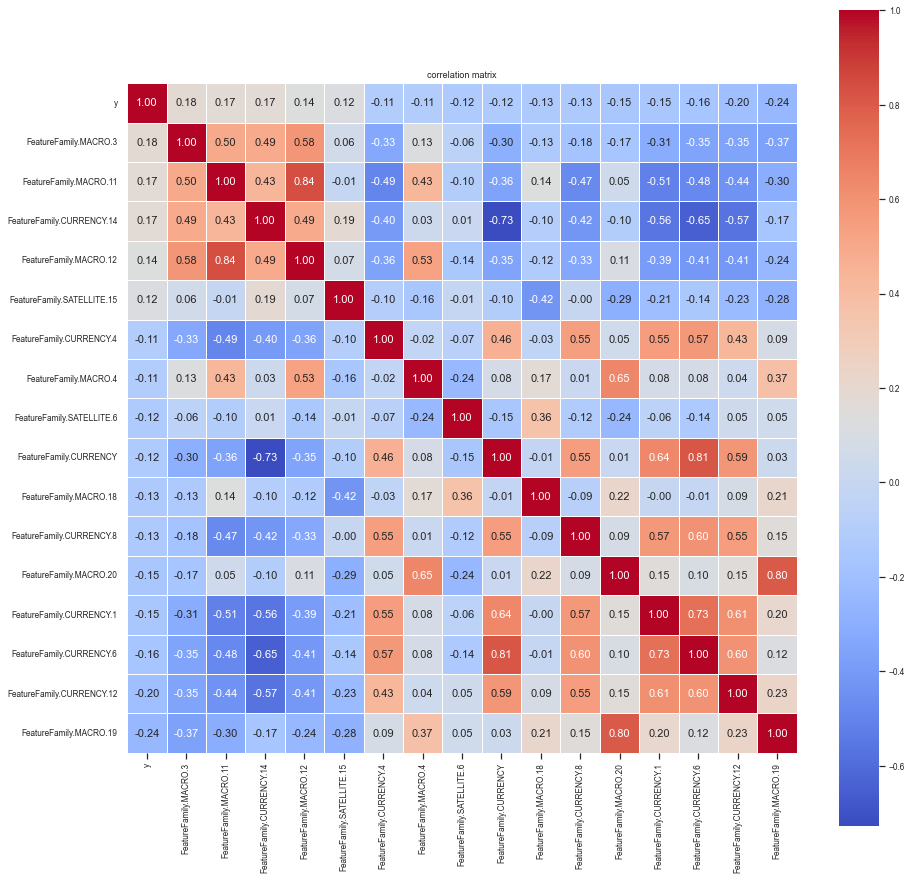

In [59]:
# correlation matrix, limited to highly correlated features
df3 = df2[df_corrH.index]

idx = df3.corr().sort_values("y", ascending=False).index
df3_sorted = df3.loc[:, idx]  # sort dataframe columns by their correlation with Appliances

plt.figure(figsize = (15,15))
sns.set(font_scale=0.75)
ax = sns.heatmap(df3_sorted.corr().round(3), 
            annot=True, 
            square=True, 
            linewidths=.75, cmap="coolwarm", 
            fmt = ".2f", 
            annot_kws = {"size": 11})
ax.xaxis.tick_bottom()
plt.title("correlation matrix")
plt.show()

## PCA

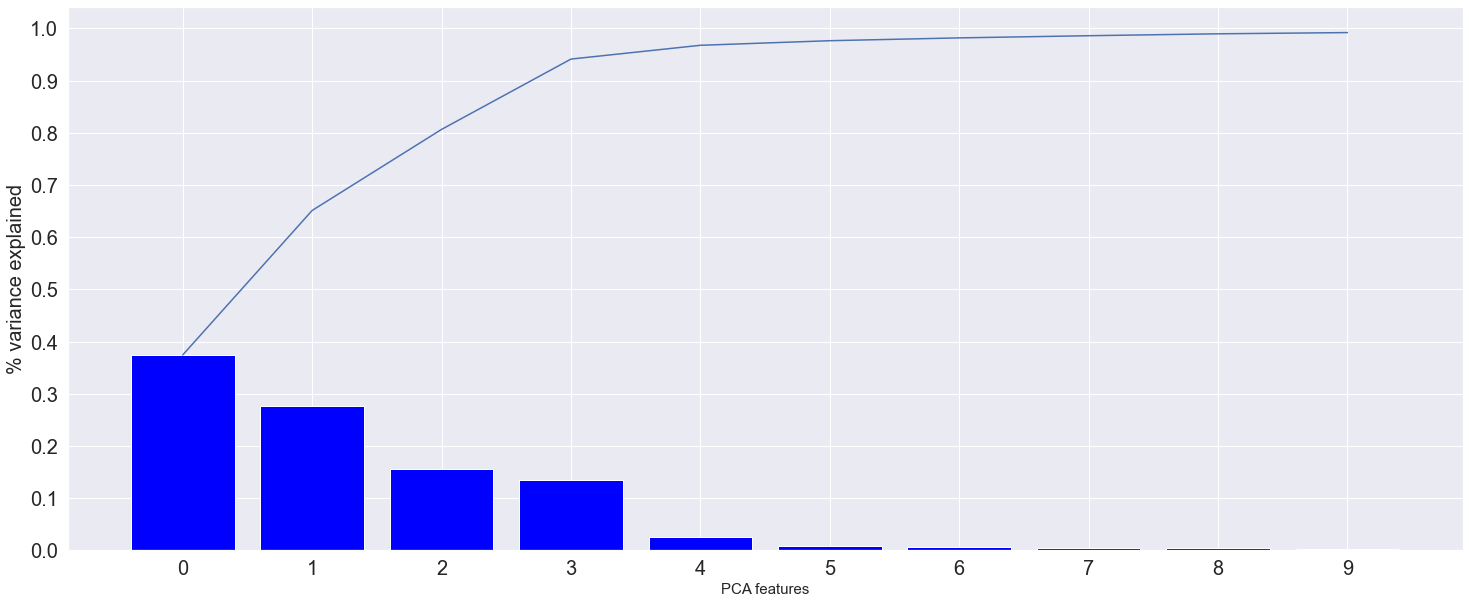

In [68]:
from sklearn.decomposition import PCA

# PCA:
# dataframe with feature columns only, without actual price
df3 = df2.copy()
df_feat = df3.loc[:, df3.columns != "y"]
#print(df_feat.info())

# principal components among features
pca = PCA(n_components=10)
res_pca = pca.fit_transform(df_feat)

# scree plot
features = range(pca.n_components_)
plt.figure(figsize = (25,10))
plt.bar(features, pca.explained_variance_ratio_, color="blue")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("PCA features", fontsize=15)
plt.ylabel("% variance explained", fontsize=20)
plt.xticks(features, fontsize=20)
plt.yticks(ticks=np.arange(0.0, 1.0001, 0.1), fontsize=20);

In [133]:
df_pca = pd.DataFrame(res_pca).add_prefix('pca_')
df_pca['y'] = df3['y'].values
df_pca.insert(0,'date','')
df_pca['date'] = df3.index

In [135]:
df_pca.to_csv('2005-2022-pca10.csv',index=False)

In [128]:
df3['y'].values

array([-0.04243958, -0.04986949, -0.04640878, ...,  0.00874652,
        0.04289776, -0.00584108])

In [70]:
np.cumsum(pca.explained_variance_ratio_)

array([0.37443167, 0.6512714 , 0.80659807, 0.94136186, 0.96777725,
       0.97655992, 0.98198083, 0.98612306, 0.9897793 , 0.99212931])

## LASSO feature selection

In [106]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [107]:
X = df_feat.values
y = df3['y'].values

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [109]:
X

array([[ 0.00000000e+00,  6.06920257e-01,  2.32227992e-01, ...,
         7.82069465e-01,  1.33335063e+00,  3.08864557e+00],
       [-7.56223011e-04,  6.61072334e-01,  2.84808716e-01, ...,
         7.81301471e-01,  1.33264674e+00,  3.08932025e+00],
       [-1.00829677e-03,  6.95045802e-01,  2.31624637e-01, ...,
         7.80534490e-01,  1.33194379e+00,  3.08999405e+00],
       ...,
       [-6.09096583e-03,  6.58960084e-01,  4.09812624e-02, ...,
         5.55342074e-01, -3.20383060e-02,  2.06508946e+00],
       [-6.05997608e-03,  7.11794022e-01,  1.41490679e-02, ...,
         5.56984287e-01, -3.20383060e-02,  2.06975345e+00],
       [-6.02692787e-03,  1.25205081e+00,  7.10418230e-02, ...,
         5.58624333e-01, -3.20383060e-02,  2.07441129e+00]])

In [116]:
model = Lasso(alpha =0.01)
model.fit(X_test,y_test)
# y_pred = model.predict(X_test)

Lasso(alpha=0.01)

In [117]:
model.coef_

array([ 0.        , -0.00034014, -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.00043311, -0.        , -0.        , -0.        ])

## ACF/PACF 

In [23]:
df_target = df_target[df_target['date'] >= '2015-01-05'].reset_index(drop=True)

In [34]:
df_target

,date,y
0,2015-01-05,0.04
1,2015-01-06,0.06
2,2015-01-07,0.05
3,2015-01-08,0.03
4,2015-01-09,0.01
...,...,...
1862,2022-02-23,0.08
1863,2022-02-24,0.04
1864,2022-02-25,0.01
1865,2022-02-28,0.04


In [35]:
df_target

,date,y
0,2015-01-05,0.04
1,2015-01-06,0.06
2,2015-01-07,0.05
3,2015-01-08,0.03
4,2015-01-09,0.01
...,...,...
1862,2022-02-23,0.08
1863,2022-02-24,0.04
1864,2022-02-25,0.01
1865,2022-02-28,0.04


In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [39]:
diff = df.al_lme_prices - df.al_lme_prices.shift(5)

In [40]:
diff = diff.fillna(0)

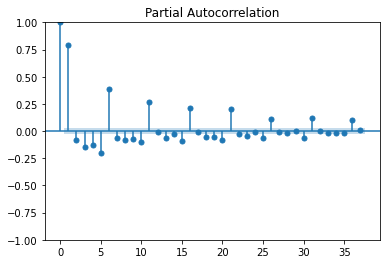

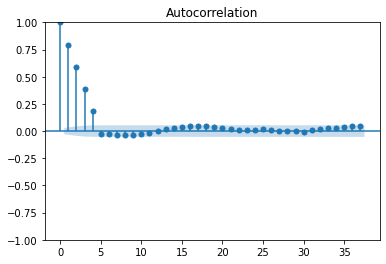

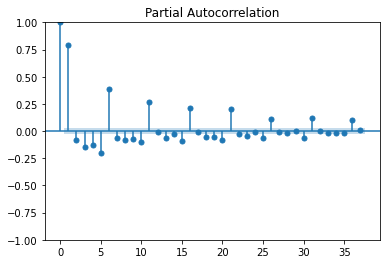

In [41]:
plot_acf(diff)
plot_pacf(diff)

<AxesSubplot:>

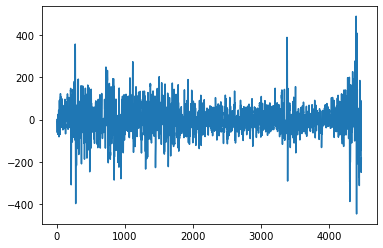

In [42]:
diff.plot()

<Figure size 432x288 with 0 Axes>

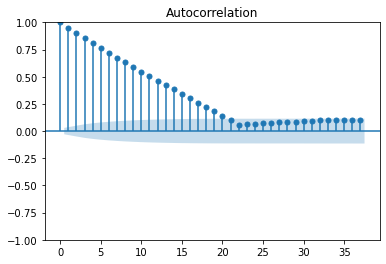

<Figure size 432x288 with 0 Axes>

In [10]:
plot_acf(df_target['y'])
plt.figure()

C:\Users\wyic6\anaconda3\envs\darts\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


<Figure size 432x288 with 0 Axes>

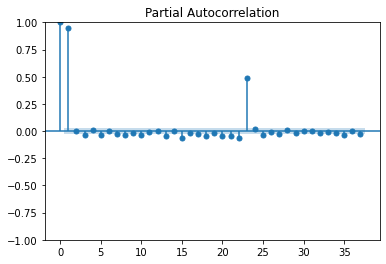

<Figure size 432x288 with 0 Axes>

In [8]:
plot_pacf(df_target['y'])
plt.figure()

## Stationarity Check

In [22]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [21]:
check_stationarity(df_target['y'])

ADF Statistic: -7.953841
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary


In [23]:
check_stationarity(df.dropna().iloc[::22, :]['return'])

ADF Statistic: -12.817518
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Stationary


In [59]:
df = df[df['date'] >= '2021-10-01']

In [9]:
df['return'] = np.log(df['al_lme_prices']).diff(22)

In [14]:
df.dropna().iloc[::22, :]

,date,al_lme_prices,return
22,2005-05-30,1735.75,-0.042440
44,2005-06-29,1721.00,-0.008534
66,2005-07-29,1836.50,0.064956
88,2005-08-30,1853.00,0.008944
110,2005-09-29,1860.00,0.003771
...,...,...,...
4378,2022-02-08,3214.50,0.101497
4400,2022-03-10,3408.50,0.058600
4422,2022-04-11,3218.25,-0.057435
4444,2022-05-11,2745.25,-0.158966


In [10]:
df[:30]

,date,al_lme_prices,return
0,2005-04-28,1811.00,NaN
1,2005-04-29,1819.25,NaN
2,2005-05-02,1819.25,NaN
3,2005-05-03,1784.75,NaN
4,2005-05-04,1753.25,NaN
5,2005-05-05,1764.75,NaN
6,2005-05-06,1757.75,NaN
7,2005-05-09,1773.25,NaN
8,2005-05-10,1774.25,NaN
9,2005-05-11,1747.25,NaN


<Figure size 432x288 with 0 Axes>

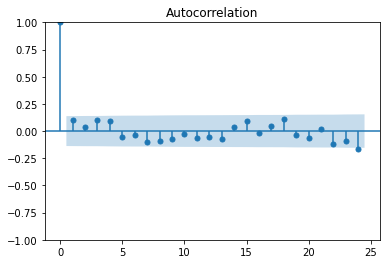

<Figure size 432x288 with 0 Axes>

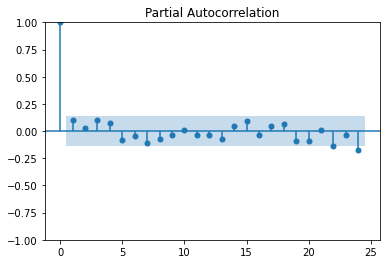

<Figure size 432x288 with 0 Axes>

In [20]:
plot_acf(df.dropna().iloc[::22, :]['return'])
plt.figure()
plot_pacf(df.dropna().iloc[::22, :]['return'])
plt.figure()

In [ ]:
plot_acf(df['return'].dropna())

In [60]:
df

,date,FeatureFamily.COT,FeatureFamily.COT.1,FeatureFamily.CTA,FeatureFamily.CTA.1,FeatureFamily.CURVE,FeatureFamily.CURVE.1,FeatureFamily.CURVE.2,FeatureFamily.CURRENCY,FeatureFamily.CURRENCY.1,...,FeatureFamily.MACRO.13,FeatureFamily.MACRO.14,FeatureFamily.MACRO.15,FeatureFamily.MACRO.16,FeatureFamily.MACRO.17,FeatureFamily.MACRO.18,FeatureFamily.MACRO.19,FeatureFamily.MACRO.20,FeatureFamily.MACRO.21,FeatureFamily.TECHNICAL
0,2005-04-28,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.6069202570021998,0.2322279922499444,...,-0.0007381919590994437,NaN,NaN,NaN,NaN,9.47341552147084,0.7820694646731705,1.3333506268986668,3.0886455675264073,NaN
1,2005-04-29,NaN,NaN,NaN,NaN,-0.0007562230112932725,NaN,NaN,0.6610723335007147,0.28480871564721333,...,-0.0008573614266775175,NaN,NaN,NaN,NaN,9.475440009019486,0.7813014707791271,1.3326467436822265,3.089320253249175,0.0
2,2005-05-02,NaN,NaN,NaN,NaN,-0.0010082967735261061,NaN,NaN,0.6950458019717398,0.23162463711330347,...,-0.0008468223795314007,NaN,NaN,NaN,NaN,9.477461798145415,0.7805344901993787,1.3319437896387103,3.0899940487854165,-2.285142739035309e-07
3,2005-05-03,NaN,NaN,NaN,NaN,-0.0019127215692048424,NaN,NaN,0.6910810869511393,0.21712230986279332,...,-0.0008365258665375895,NaN,NaN,NaN,NaN,9.479480892481481,0.7797685215969066,1.3312417635409377,3.0906669553096515,-1.589134606998048e-06
4,2005-05-04,NaN,NaN,NaN,NaN,-0.002984943173659976,NaN,NaN,0.19749900828710665,0.14626368419598876,...,-0.0008264636194786799,NaN,NaN,NaN,NaN,9.481497295655553,0.7790035636364563,1.3305406641633502,3.091338973994852,-2.166072617243442e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,2022-02-23,-0.724644240561606,0.07768135087833393,0.4173965177870701,0.4417710253890018,-0.006176561045793125,0.00014110607633679444,0.0054917607241385955,0.36317771789039915,0.06870054848317501,...,0.00017647577334217802,-0.00029114108012461503,0.000170078908520732,0.00028842149822282256,-3.05348668169073e-05,6.441375250429994,0.552051135634594,-0.03203830599747443,2.055742981215075,4.937318342943171e-05
4390,2022-02-24,-0.7253728166954967,0.077603343155349,0.41280402778782616,0.4355881872565027,-0.006129443703284178,0.00014858933675312785,0.005473861819523739,1.1138983124388913,0.13577198056434503,...,0.00014914400149619074,-0.00025345303130112565,0.00016982972393570379,0.0002869444153071202,-3.0456455703925866e-05,6.438154027697224,0.5536976908339345,-0.03203830599747443,2.060419306381441,5.574933574333061e-05
4391,2022-02-25,-0.7260994405605931,0.07759744114086506,0.4110919542331751,0.4345353172232314,-0.006090965827736937,0.0001488727326069277,0.005457109245001624,0.6589600838031493,0.04098126237919003,...,0.0001617675633830945,-0.0002206436791683051,0.00016958090615537582,0.0002854748969244625,-3.0378246257392675e-05,6.434937055206741,0.5553420735531619,-0.03203830599747443,2.06508946156156,5.246848657891579e-05
4392,2022-02-28,-0.7268241175175817,0.07759157994482307,0.40992192854996695,0.4338862520270917,-0.006059976078138403,0.0001432956284093842,0.005442048885085476,0.7117940221125941,0.014149067925510886,...,0.00016392963631020843,0.0031907093595169396,0.00012008104856443643,0.00012202450792880543,8.384744577370067e-05,6.43172432735039,0.5569842866586666,-0.03203830599747443,2.0697534548961687,5.214685620488183e-05


In [61]:
4400//5

880

In [ ]:
500